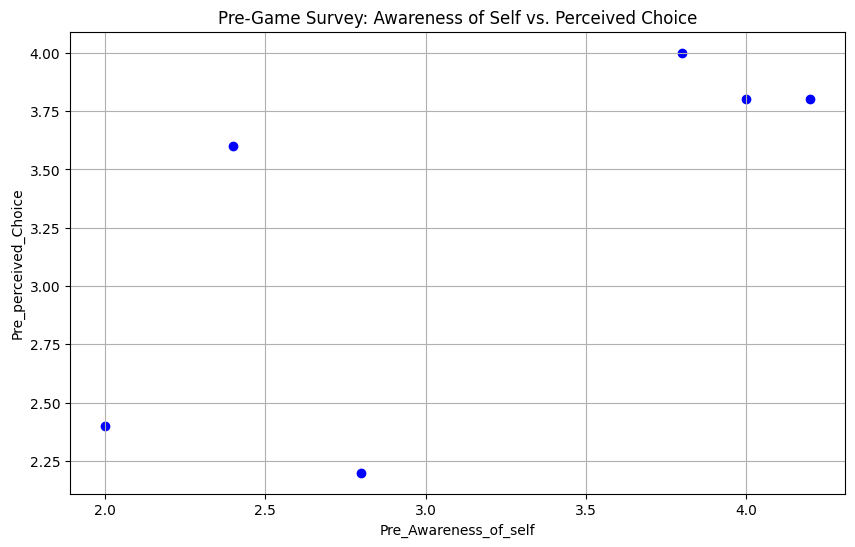

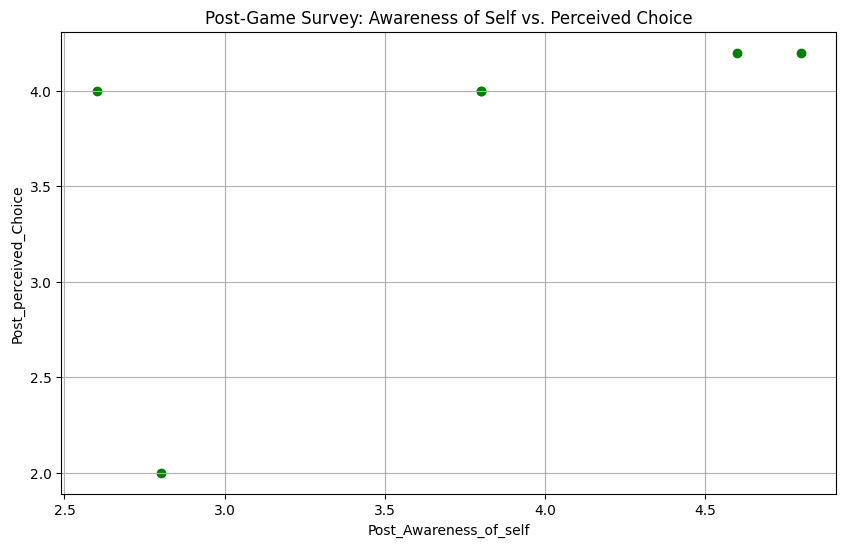

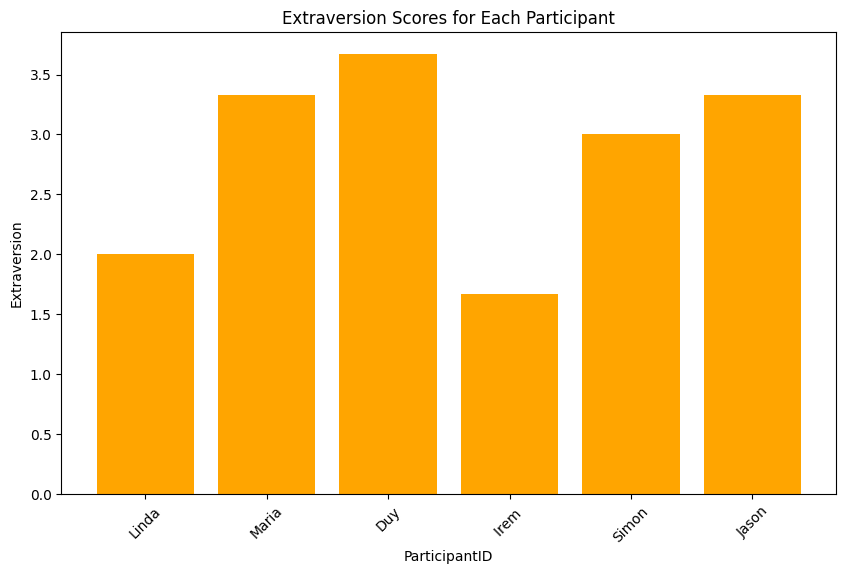

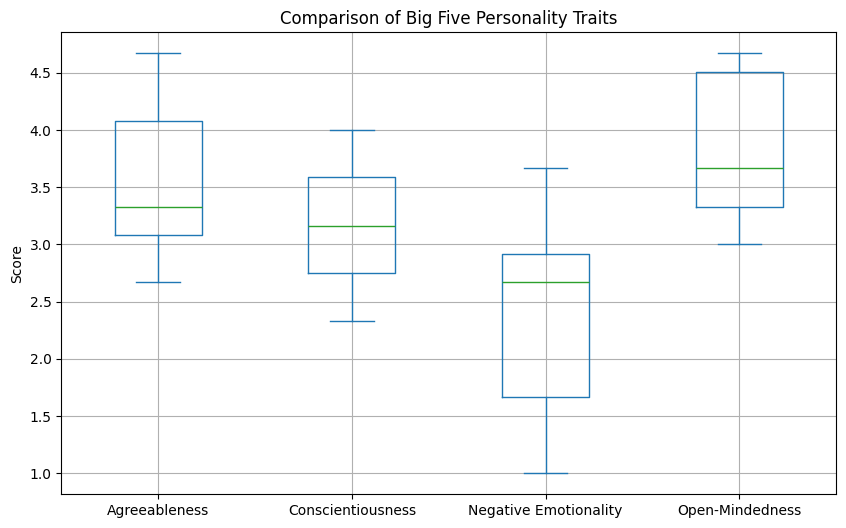

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('survey_data.csv')

# Scatter plot comparing Pre_Awareness_of_self and Pre_perceived_Choice
plt.figure(figsize=(10, 6))
plt.scatter(data['Pre_Awareness_of_self'], data['Pre_perceived_Choice'], color='blue')
plt.title('Pre-Game Survey: Awareness of Self vs. Perceived Choice')
plt.xlabel('Pre_Awareness_of_self')
plt.ylabel('Pre_perceived_Choice')
plt.grid(True)
plt.show()

# Scatter plot comparing Post_Awareness_of_self and Post_perceived_Choice
plt.figure(figsize=(10, 6))
plt.scatter(data['Post_Awareness_of_self'], data['Post_perceived_Choice'], color='green')
plt.title('Post-Game Survey: Awareness of Self vs. Perceived Choice')
plt.xlabel('Post_Awareness_of_self')
plt.ylabel('Post_perceived_Choice')
plt.grid(True)
plt.show()

# Bar plot comparing Extraversion for each participant
plt.figure(figsize=(10, 6))
plt.bar(data['ParticipantID'], data['Extraversion'], color='orange')
plt.title('Extraversion Scores for Each Participant')
plt.xlabel('ParticipantID')
plt.ylabel('Extraversion')
plt.xticks(rotation=45)
plt.show()

# Box plot comparing Agreeableness, Conscientiousness, Negative Emotionality, and Open-Mindedness
traits = ['Agreeableness', 'Conscientiousness', 'Negative Emotionality', 'Open-Mindedness']
data[traits].plot(kind='box', figsize=(10, 6))
plt.title('Comparison of Big Five Personality Traits')
plt.ylabel('Score')
plt.grid(True)
plt.show()


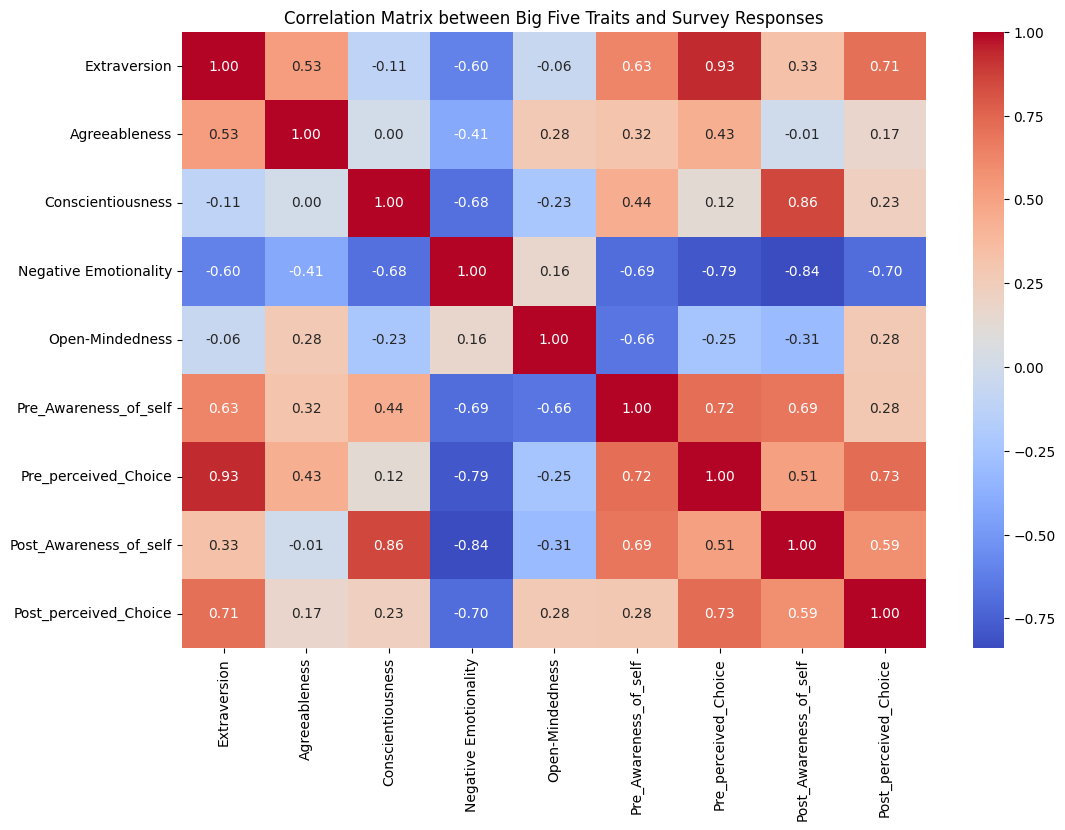

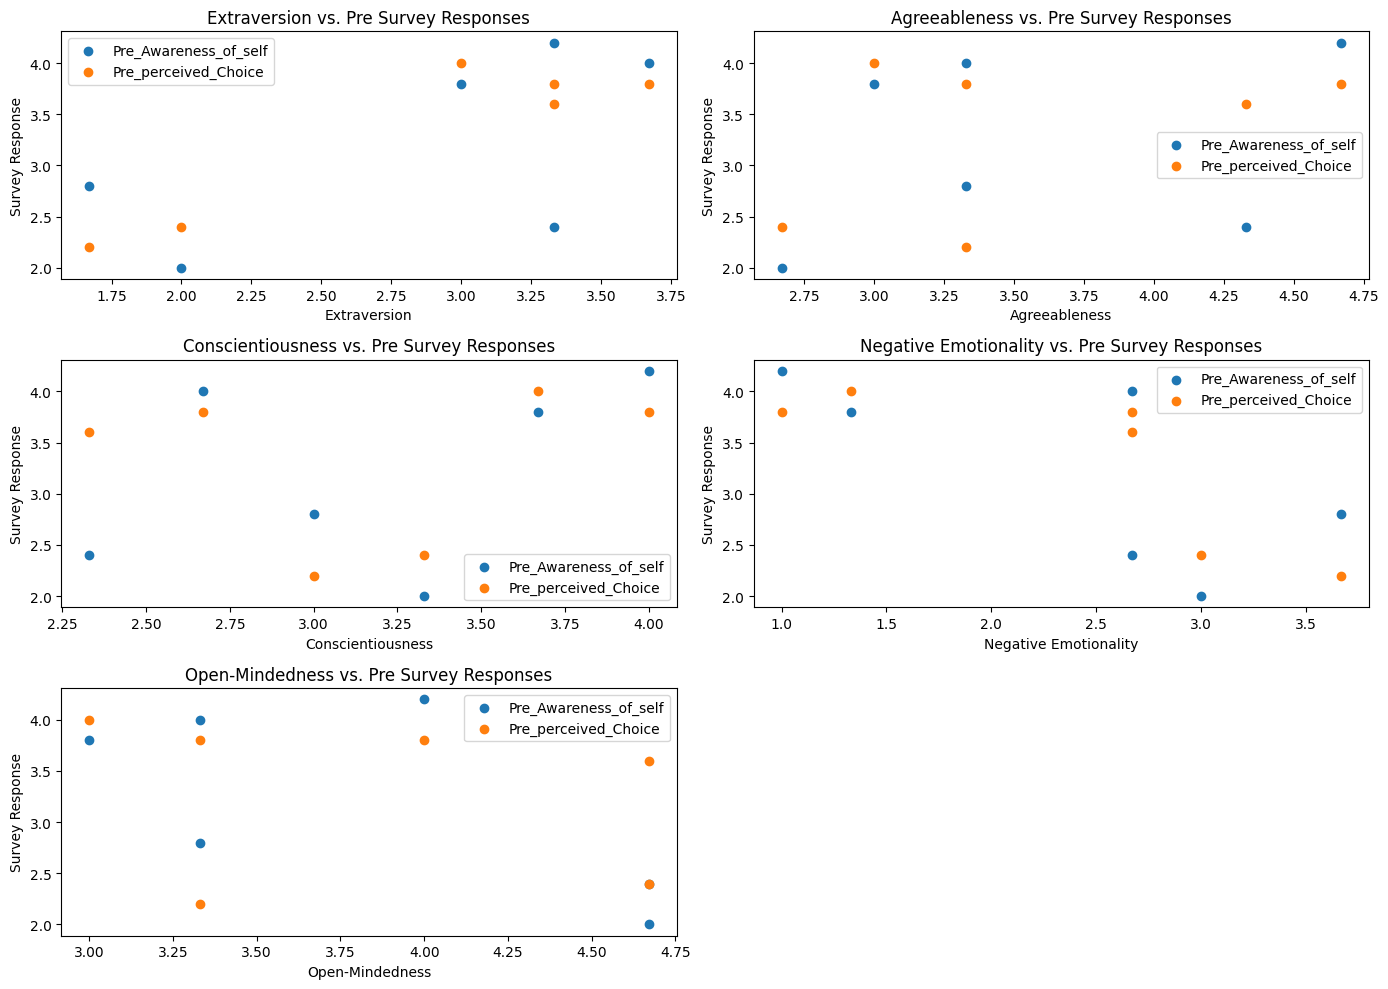

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file
data = pd.read_csv('survey_data.csv')

# Calculate correlation matrix
correlation_matrix = data[['Extraversion', 'Agreeableness', 'Conscientiousness', 'Negative Emotionality', 'Open-Mindedness',
                           'Pre_Awareness_of_self', 'Pre_perceived_Choice', 'Post_Awareness_of_self', 'Post_perceived_Choice']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix between Big Five Traits and Survey Responses')
plt.show()

# Scatter plots for each trait vs. Pre_Awareness_of_self and Pre_perceived_Choice
plt.figure(figsize=(14, 10))
traits = ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Negative Emotionality', 'Open-Mindedness']
for i, trait in enumerate(traits, 1):
    plt.subplot(3, 2, i)
    plt.scatter(data[trait], data['Pre_Awareness_of_self'], label='Pre_Awareness_of_self')
    plt.scatter(data[trait], data['Pre_perceived_Choice'], label='Pre_perceived_Choice')
    plt.title(f'{trait} vs. Pre Survey Responses')
    plt.xlabel(trait)
    plt.ylabel('Survey Response')
    plt.legend()

plt.tight_layout()
plt.show()


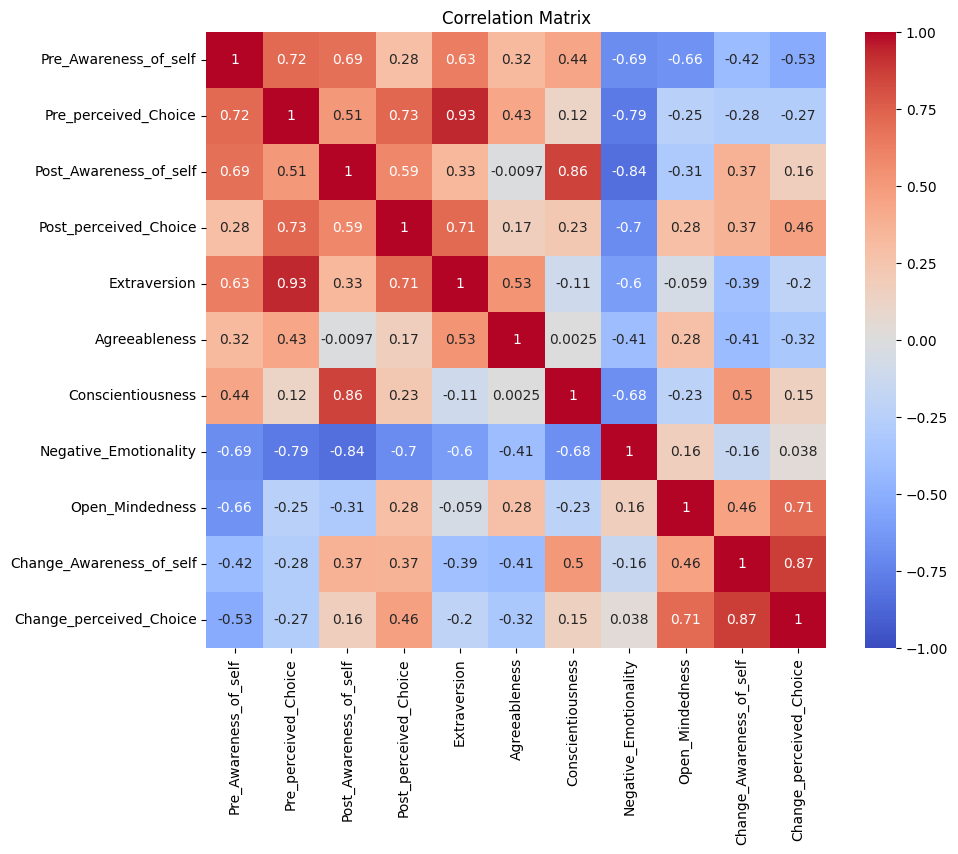

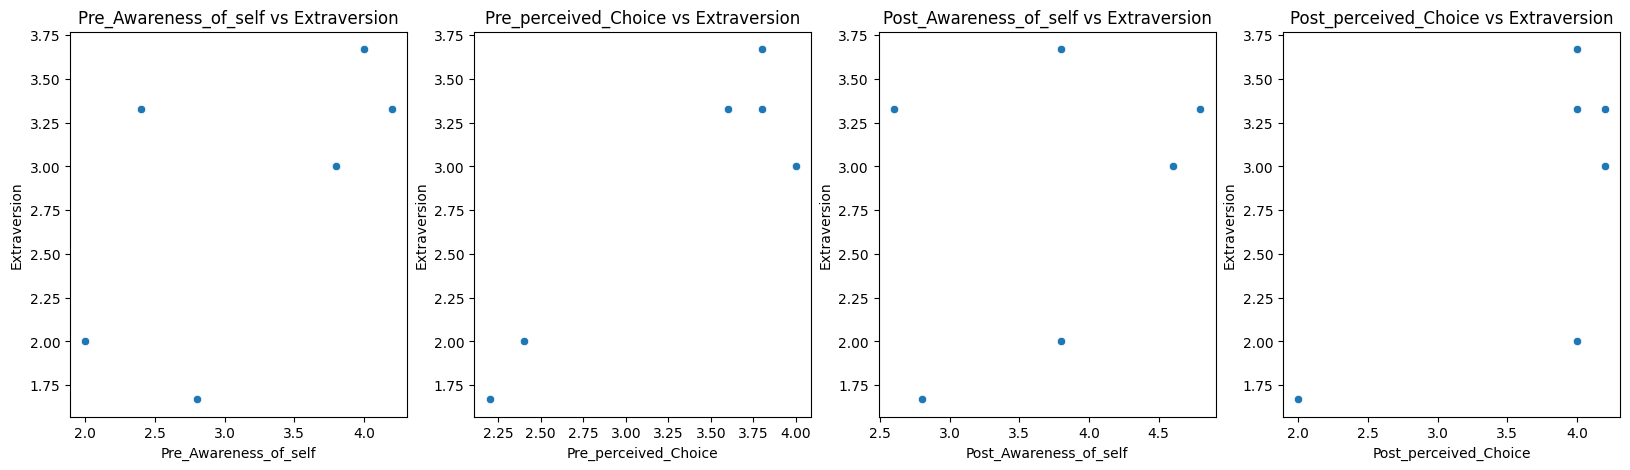

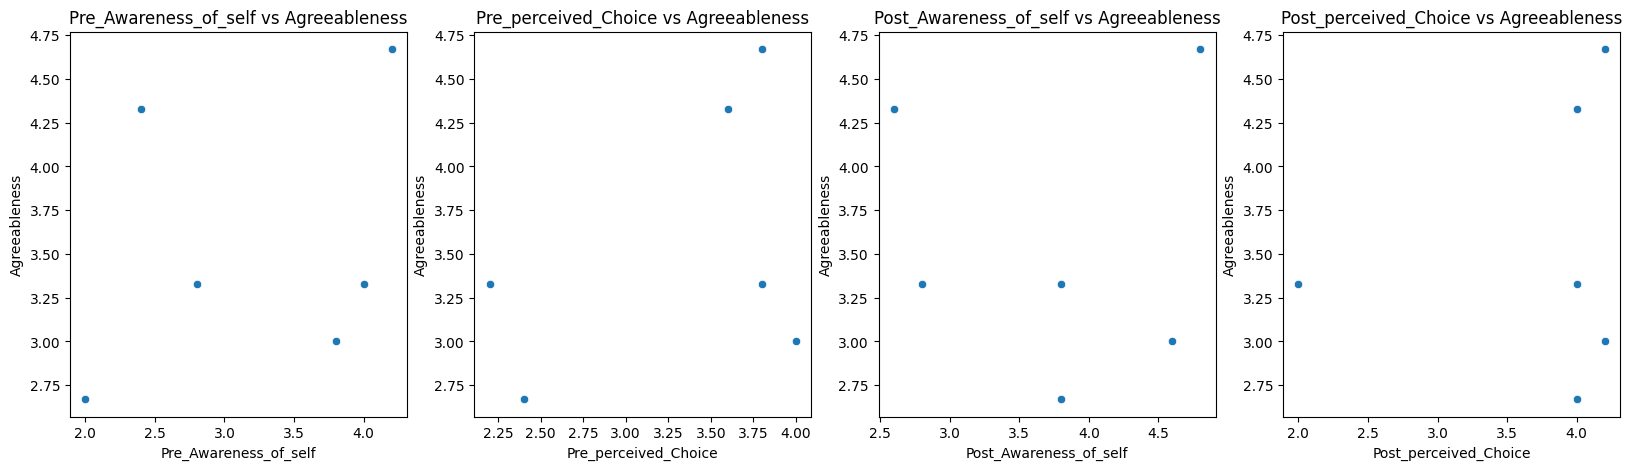

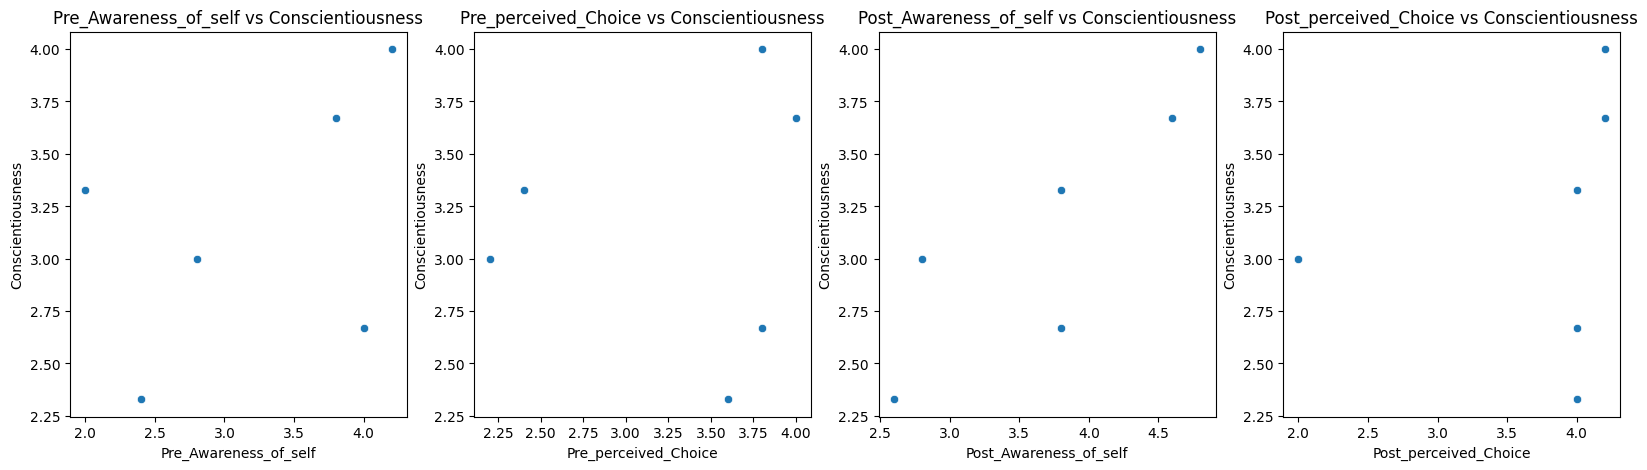

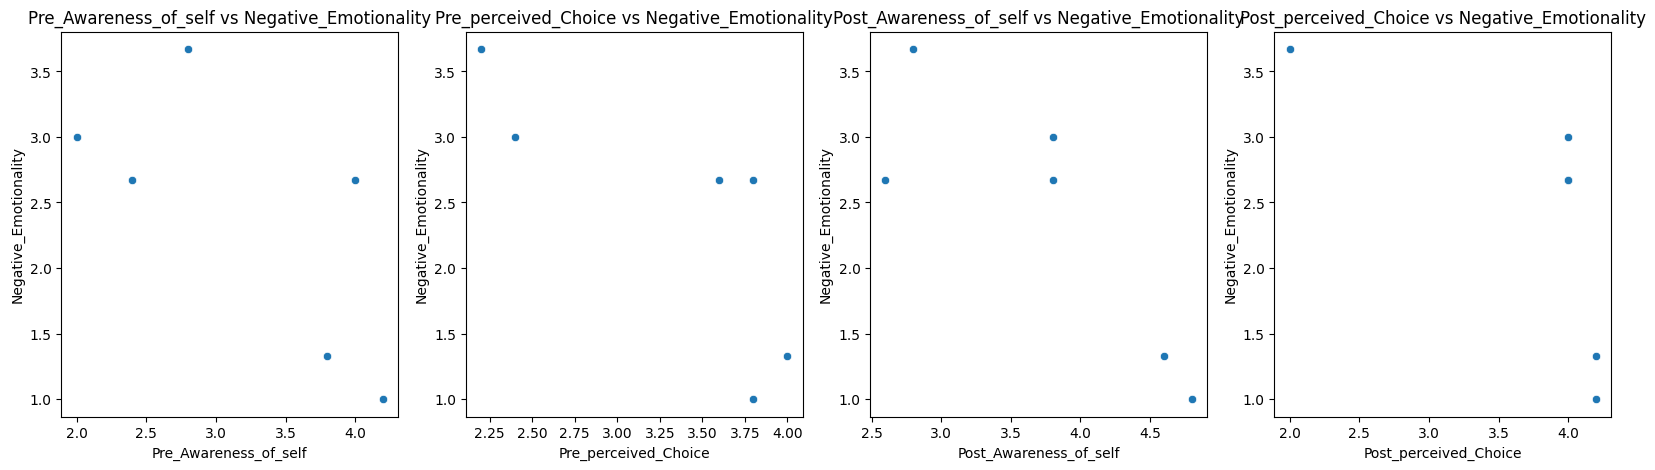

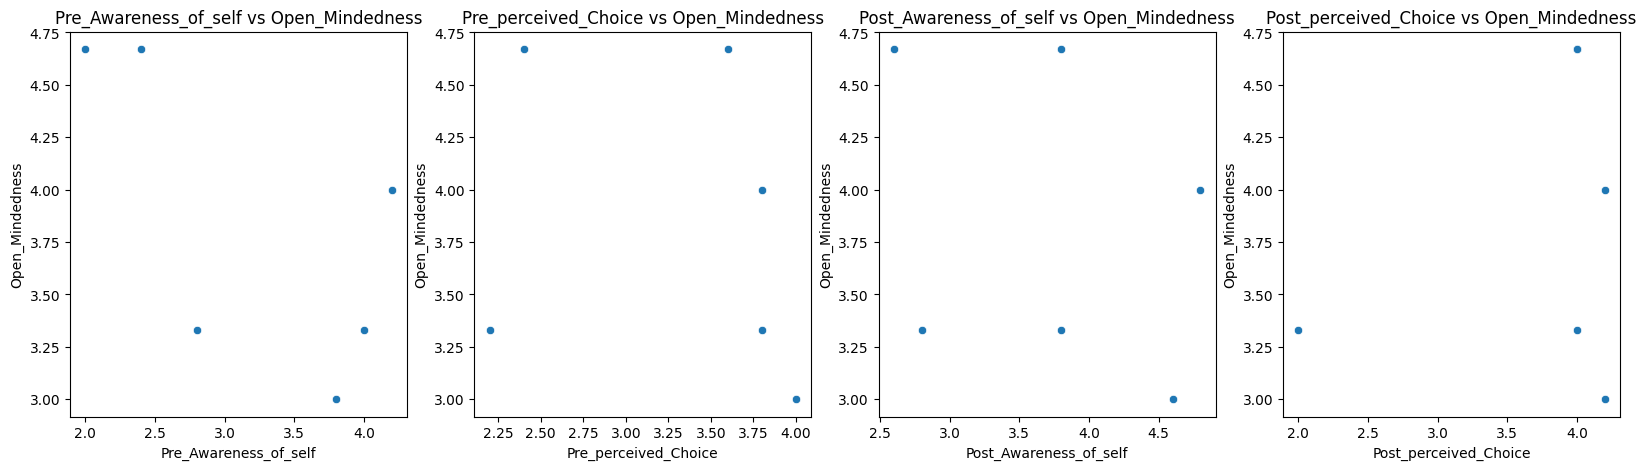

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data into a DataFrame
data = {
    "ParticipantID": ["Particip1", "Particip2", "Particip3", "Particip4", "Particip5", "Particip6"],
    "Pre_Awareness_of_self": [2, 2.4, 4, 2.8, 3.8, 4.2],
    "Pre_perceived_Choice": [2.4, 3.6, 3.8, 2.2, 4, 3.8],
    "Post_Awareness_of_self": [3.8, 2.6, 3.8, 2.8, 4.6, 4.8],
    "Post_perceived_Choice": [4, 4, 4, 2, 4.2, 4.2],
    "Extraversion": [2, 3.33, 3.67, 1.67, 3, 3.33],
    "Agreeableness": [2.67, 4.33, 3.33, 3.33, 3, 4.67],
    "Conscientiousness": [3.33, 2.33, 2.67, 3, 3.67, 4],
    "Negative_Emotionality": [3, 2.67, 2.67, 3.67, 1.33, 1],
    "Open_Mindedness": [4.67, 4.67, 3.33, 3.33, 3, 4]
}

df = pd.DataFrame(data)

# Calculate changes in awareness and perceived choice
df["Change_Awareness_of_self"] = df["Post_Awareness_of_self"] - df["Pre_Awareness_of_self"]
df["Change_perceived_Choice"] = df["Post_perceived_Choice"] - df["Pre_perceived_Choice"]

# Drop ParticipantID column for correlation calculation
df_numeric = df.drop(columns=["ParticipantID"])

# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Plotting the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

# Scatter plots for visualization
traits = ["Extraversion", "Agreeableness", "Conscientiousness", "Negative_Emotionality", "Open_Mindedness"]
x_axes = ["Pre_Awareness_of_self", "Pre_perceived_Choice", "Post_Awareness_of_self", "Post_perceived_Choice"]

for trait in traits:
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))
    for i, x_axis in enumerate(x_axes):
        sns.scatterplot(x=df[x_axis], y=df[trait], ax=axs[i])
        axs[i].set_title(f"{x_axis} vs {trait}")
    plt.show()


In [4]:
import statsmodels.api as sm

# Fit linear regression models for each trait with self-awareness and perceived choice
traits = ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Negative Emotionality', 'Open-Mindedness']
for trait in traits:
    X = data[trait]
    y1 = data['Pre_Awareness_of_self']
    y2 = data['Pre_perceived_Choice']

    X = sm.add_constant(X)  # Adding a constant for the intercept
    model1 = sm.OLS(y1, X).fit()
    model2 = sm.OLS(y2, X).fit()

    # Print regression results including p-values
    print(f"Trait: {trait}")
    print(model1.summary())
    print(model2.summary())
    print("\n")


Trait: Extraversion
                              OLS Regression Results                             
Dep. Variable:     Pre_Awareness_of_self   R-squared:                       0.393
Model:                               OLS   Adj. R-squared:                  0.241
Method:                    Least Squares   F-statistic:                     2.590
Date:                   Fri, 26 Jul 2024   Prob (F-statistic):              0.183
Time:                           17:06:50   Log-Likelihood:                -5.9742
No. Observations:                      6   AIC:                             15.95
Df Residuals:                          4   BIC:                             15.53
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with

Correlation with Pre_Awareness_of_self:
Extraversion: Correlation = 0.6269239937876765, P-Value = 0.18281513588211504
Agreeableness: Correlation = 0.31604884726324667, P-Value = 0.5417112947746566
Conscientiousness: Correlation = 0.44457950067929514, P-Value = 0.3770665254040426
Negative Emotionality: Correlation = -0.6948719990280343, P-Value = 0.12545046453325373
Open-Mindedness: Correlation = -0.6613423804202762, P-Value = 0.15261332591100996


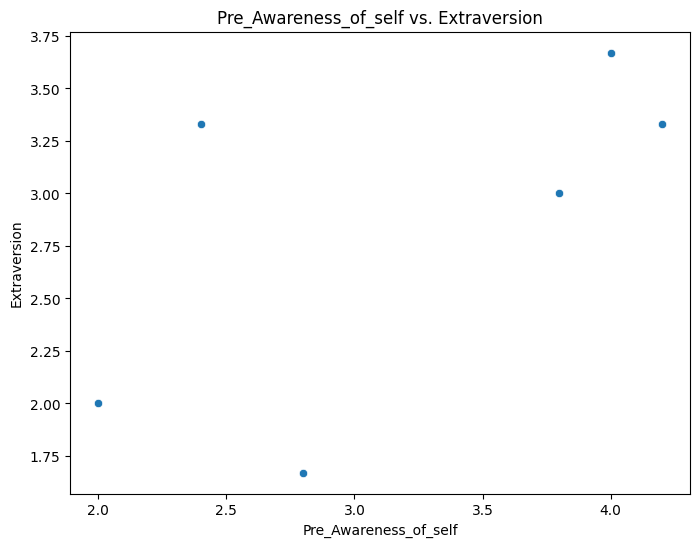

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Load the data into a pandas DataFrame
data = {
    'ParticipantID': ['Linda', 'Maria', 'Duy', 'Irem', 'Simon', 'Jason'],
    'Pre_Awareness_of_self': [2.0, 2.4, 4.0, 2.8, 3.8, 4.2],
    'Pre_perceived_Choice': [2.4, 3.6, 3.8, 2.2, 4.0, 3.8],
    'Extraversion': [2.0, 3.33, 3.67, 1.67, 3.0, 3.33],
    'Agreeableness': [2.67, 4.33, 3.33, 3.33, 3.0, 4.67],
    'Conscientiousness': [3.33, 2.33, 2.67, 3.0, 3.67, 4.0],
    'Negative Emotionality': [3.0, 2.67, 2.67, 3.67, 1.33, 1.0],
    'Open-Mindedness': [4.67, 4.67, 3.33, 3.33, 3.0, 4.0]
}

df = pd.DataFrame(data)

# Calculate Pearson correlation and p-values for Pre_Awareness_of_self with personality traits
print("Correlation with Pre_Awareness_of_self:")
for trait in ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Negative Emotionality', 'Open-Mindedness']:
    corr, p_val = pearsonr(df['Pre_Awareness_of_self'], df[trait])
    print(f"{trait}: Correlation = {corr}, P-Value = {p_val}")

# Create a scatter plot to visualize the relationship between Pre_Awareness_of_self and Extraversion
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Pre_Awareness_of_self', y='Extraversion', data=df)
plt.title('Pre_Awareness_of_self vs. Extraversion')
plt.xlabel('Pre_Awareness_of_self')
plt.ylabel('Extraversion')
plt.show()



Correlation with Post_Awareness_of_self:
Extraversion: Correlation = 0.07709721500542538, P-Value = 0.8845833096655344
Agreeableness: Correlation = 0.10454863425437841, P-Value = 0.8437484286990738
Conscientiousness: Correlation = 0.34947110616853294, P-Value = 0.49713380328925477
Negative Emotionality: Correlation = -0.3732061660436767, P-Value = 0.46618135873333527
Open-Mindedness: Correlation = -0.8537515296236327, P-Value = 0.030518896511138233


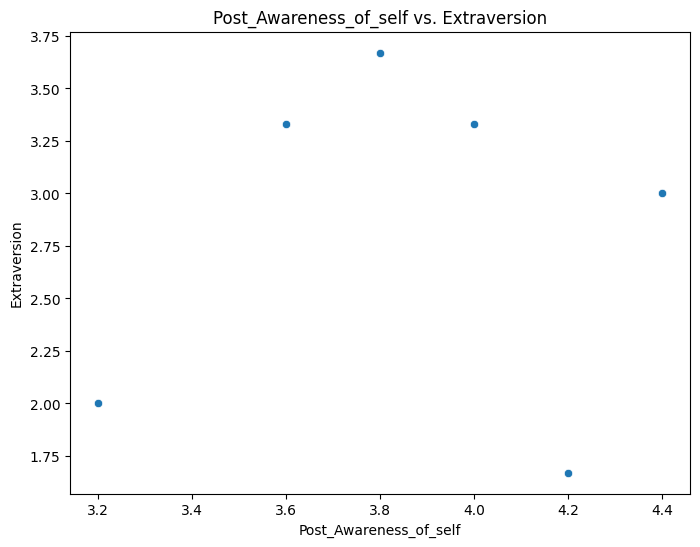

In [6]:
# Update the dataset to include post-awareness and post-perceived choice data
data['Post_Awareness_of_self'] = [3.2, 3.6, 3.8, 4.2, 4.4, 4.0]
data['Post_perceived_Choice'] = [3.0, 3.8, 4.0, 3.6, 4.2, 3.6]

df = pd.DataFrame(data)

# Calculate Pearson correlation and p-values for Post_Awareness_of_self with personality traits
print("\nCorrelation with Post_Awareness_of_self:")
for trait in ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Negative Emotionality', 'Open-Mindedness']:
    corr, p_val = pearsonr(df['Post_Awareness_of_self'], df[trait])
    print(f"{trait}: Correlation = {corr}, P-Value = {p_val}")

# Create a scatter plot to visualize the relationship between Post_Awareness_of_self and Extraversion
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Post_Awareness_of_self', y='Extraversion', data=df)
plt.title('Post_Awareness_of_self vs. Extraversion')
plt.xlabel('Post_Awareness_of_self')
plt.ylabel('Extraversion')
plt.show()


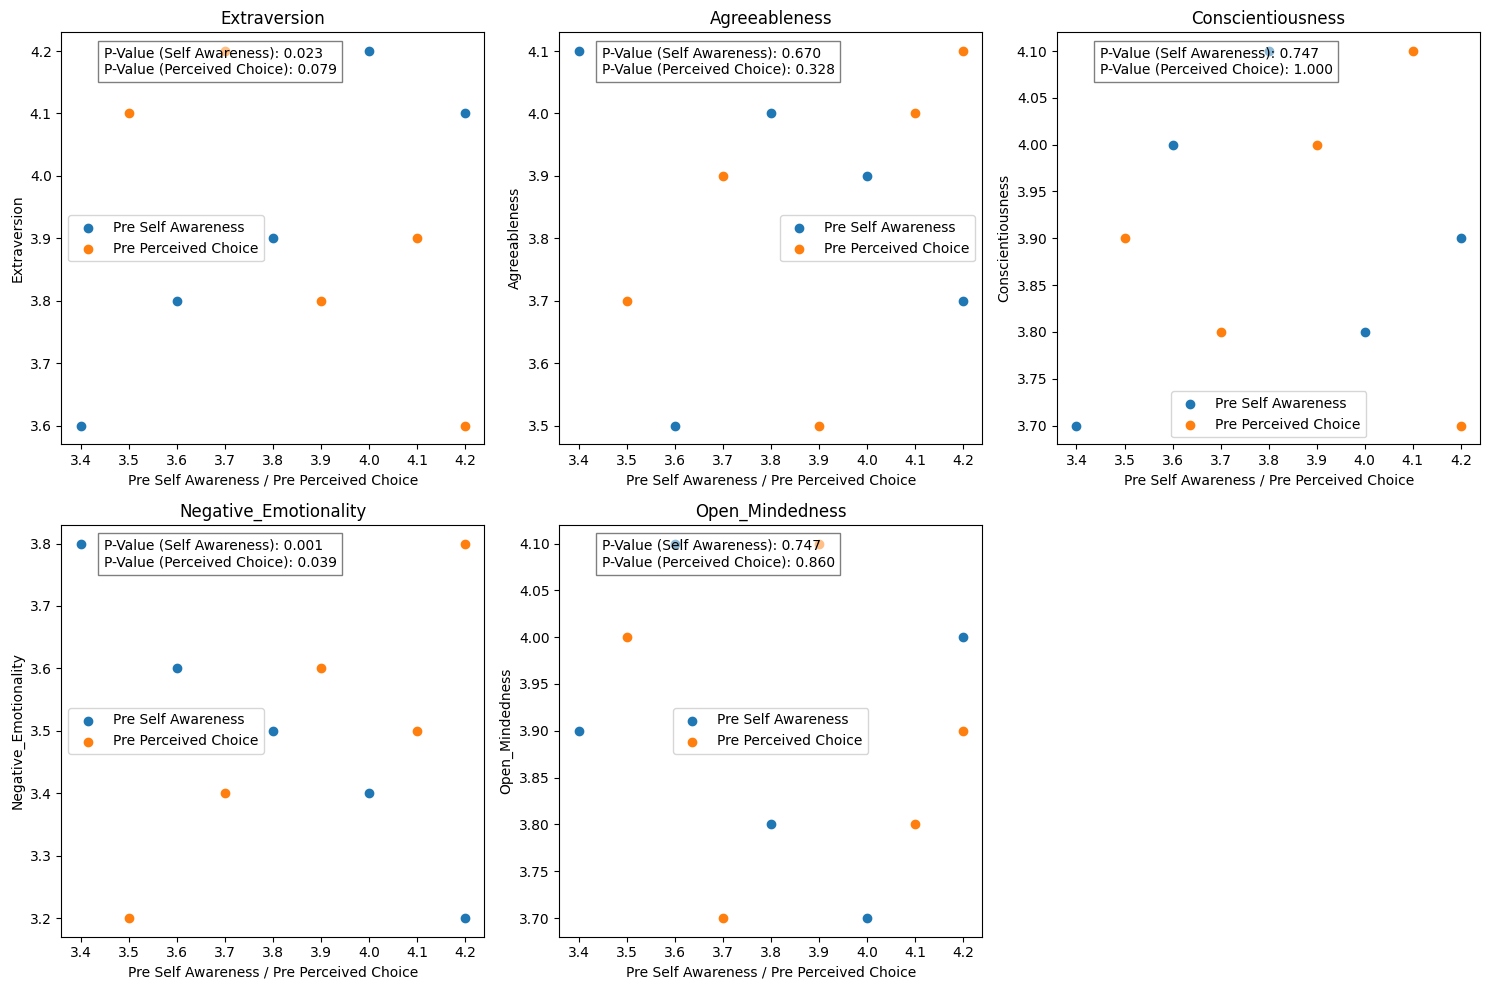

In [7]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Sample data (replace this with your actual dataset)
data = {
    'Pre_Self_Awareness': [4.2, 3.8, 3.6, 4.0, 3.4],
    'Pre_Perceived_Choice': [3.5, 4.1, 3.9, 3.7, 4.2],
    'Extraversion': [4.1, 3.9, 3.8, 4.2, 3.6],
    'Agreeableness': [3.7, 4.0, 3.5, 3.9, 4.1],
    'Conscientiousness': [3.9, 4.1, 4.0, 3.8, 3.7],
    'Negative_Emotionality': [3.2, 3.5, 3.6, 3.4, 3.8],
    'Open_Mindedness': [4.0, 3.8, 4.1, 3.7, 3.9]
}

df = pd.DataFrame(data)

# Calculate correlations and p-values for each trait
correlations = {}
p_values = {}

for trait in ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Negative_Emotionality', 'Open_Mindedness']:
    corr_self_awareness, p_val_self_awareness = pearsonr(df['Pre_Self_Awareness'], df[trait])
    corr_perceived_choice, p_val_perceived_choice = pearsonr(df['Pre_Perceived_Choice'], df[trait])
    
    correlations[trait] = (corr_self_awareness, corr_perceived_choice)
    p_values[trait] = (p_val_self_awareness, p_val_perceived_choice)

# Plotting the graphs
plt.figure(figsize=(15, 10))

for i, trait in enumerate(correlations.keys()):
    ax = plt.subplot(2, 3, i+1)
    plt.scatter(df['Pre_Self_Awareness'], df[trait], label='Pre Self Awareness')
    plt.scatter(df['Pre_Perceived_Choice'], df[trait], label='Pre Perceived Choice')
    plt.title(trait)
    plt.xlabel('Pre Self Awareness / Pre Perceived Choice')
    plt.ylabel(trait)
    plt.legend()
    plt.text(0.1, 0.9, f"P-Value (Self Awareness): {p_values[trait][0]:.3f}\nP-Value (Perceived Choice): {p_values[trait][1]:.3f}", 
             transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()


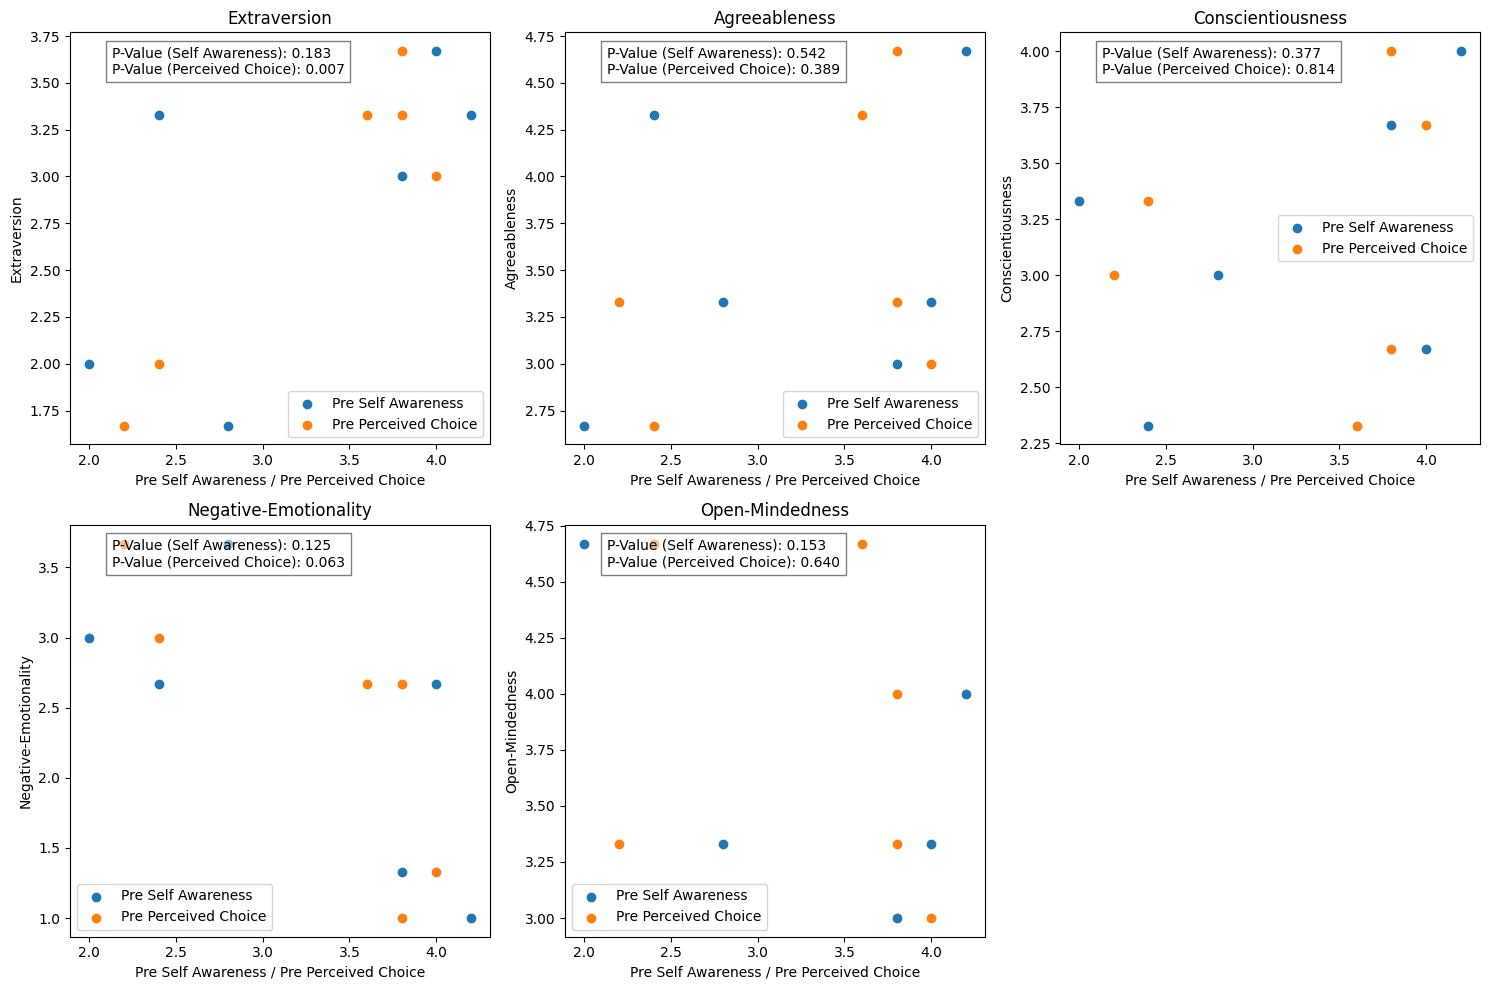

In [12]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Load your actual data
df = pd.read_csv('survey_data.csv')

# Calculate correlations and p-values for each trait
correlations = {}
p_values = {}

for trait in ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Negative-Emotionality', 'Open-Mindedness']:
    corr_self_awareness, p_val_self_awareness = pearsonr(df['Pre_Awareness_of_self'], df[trait])
    corr_perceived_choice, p_val_perceived_choice = pearsonr(df['Pre_perceived_Choice'], df[trait])
    
    correlations[trait] = (corr_self_awareness, corr_perceived_choice)
    p_values[trait] = (p_val_self_awareness, p_val_perceived_choice)

# Plotting the graphs
plt.figure(figsize=(15, 10))

for i, trait in enumerate(correlations.keys()):
    ax = plt.subplot(2, 3, i+1)
    plt.scatter(df['Pre_Awareness_of_self'], df[trait], label='Pre Self Awareness')
    plt.scatter(df['Pre_perceived_Choice'], df[trait], label='Pre Perceived Choice')
    plt.title(trait)
    plt.xlabel('Pre Self Awareness / Pre Perceived Choice')
    plt.ylabel(trait)
    plt.legend()
    plt.text(0.1, 0.9, f"P-Value (Self Awareness): {p_values[trait][0]:.3f}\nP-Value (Perceived Choice): {p_values[trait][1]:.3f}", 
             transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()


In [8]:
import pandas as pd
from scipy.stats import pearsonr

# Load your actual data
df = pd.read_csv('survey_data.csv')

# Calculate correlations and p-values for each trait
correlations = {}
p_values = {}

for trait in ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Negative Emotionality', 'Open-Mindedness']:
    corr_self_awareness, p_val_self_awareness = pearsonr(df['Pre_Awareness_of_self'], df[trait])
    corr_perceived_choice, p_val_perceived_choice = pearsonr(df['Pre_perceived_Choice'], df[trait])
    
    correlations[trait] = (corr_self_awareness, corr_perceived_choice)
    p_values[trait] = (p_val_self_awareness, p_val_perceived_choice)

# Print results where p-values are less than 0.05
for trait in p_values.keys():
    if p_values[trait][0] < 0.05 or p_values[trait][1] < 0.05:
        print(f"Trait: {trait}")
        print(f"  P-Value (Self Awareness): {p_values[trait][0]:.3f}")
        print(f"  P-Value (Perceived Choice): {p_values[trait][1]:.3f}")
        print()


Trait: Extraversion
  P-Value (Self Awareness): 0.183
  P-Value (Perceived Choice): 0.007



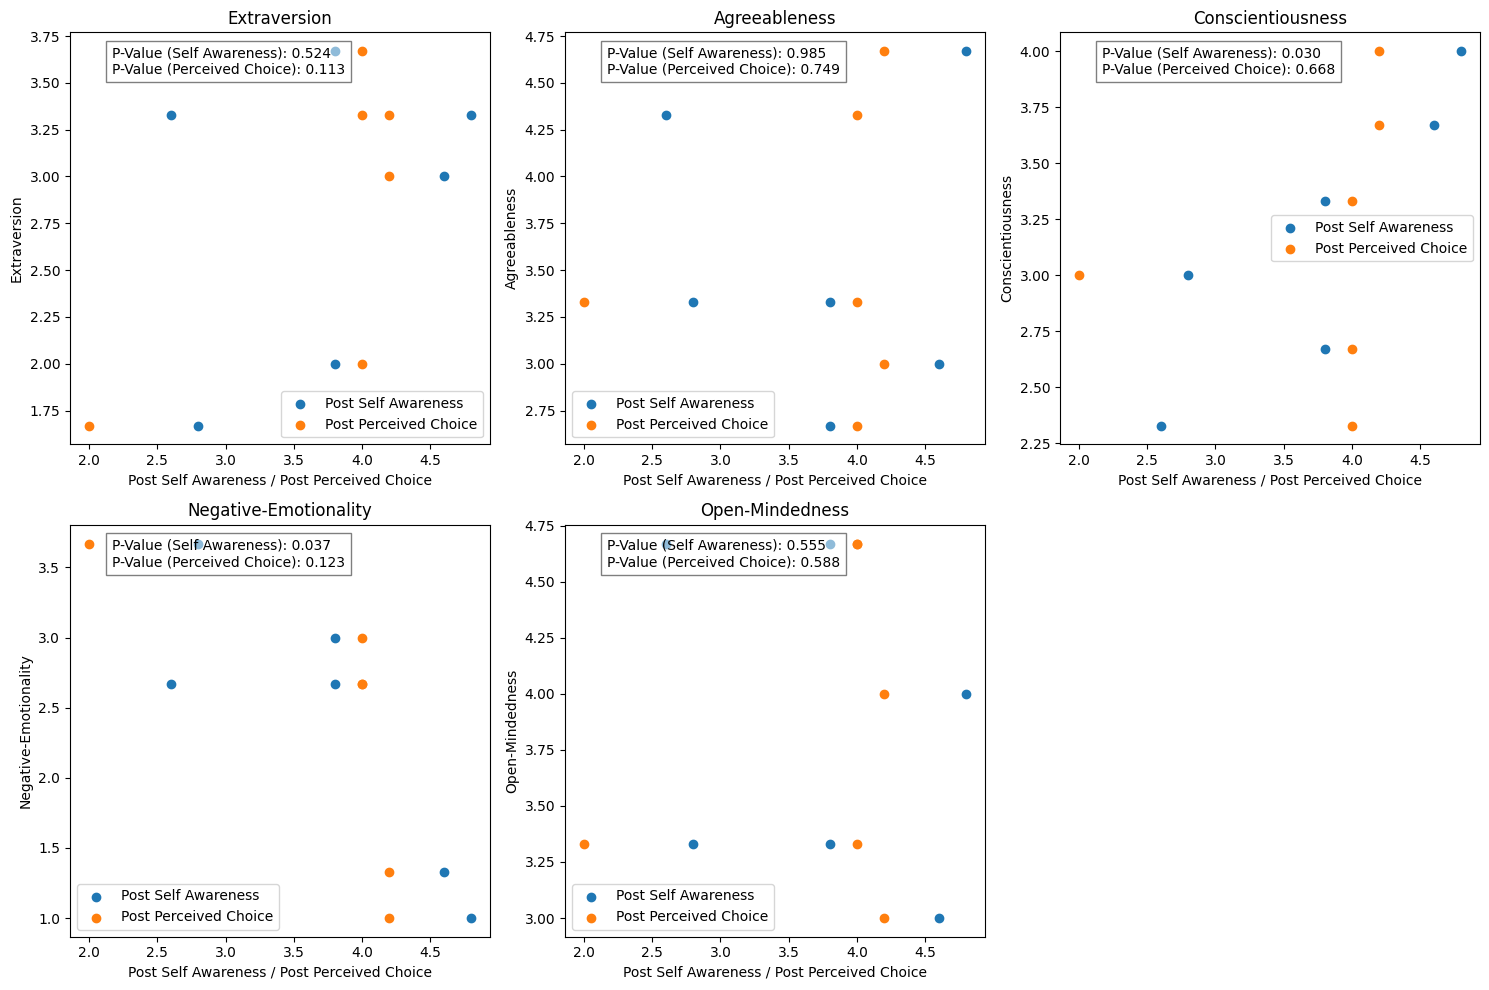

In [14]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Load your actual data
df = pd.read_csv('survey_data.csv')

# Calculate correlations and p-values for each trait with post-survey data
correlations_post = {}
p_values_post = {}

for trait in ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Negative-Emotionality', 'Open-Mindedness']:
    # Pearson correlation and p-value for Post_Awareness_of_self
    corr_post_awareness, p_val_post_awareness = pearsonr(df['Post_Awareness_of_self'], df[trait])
    
    # Pearson correlation and p-value for Post_perceived_Choice
    corr_post_perceived_choice, p_val_post_perceived_choice = pearsonr(df['Post_perceived_Choice'], df[trait])
    
    # Store results
    correlations_post[trait] = (corr_post_awareness, corr_post_perceived_choice)
    p_values_post[trait] = (p_val_post_awareness, p_val_post_perceived_choice)

# Plotting the graphs
plt.figure(figsize=(15, 10))

for i, trait in enumerate(correlations_post.keys()):
    ax = plt.subplot(2, 3, i+1)
    plt.scatter(df['Post_Awareness_of_self'], df[trait], label='Post Self Awareness')
    plt.scatter(df['Post_perceived_Choice'], df[trait], label='Post Perceived Choice')
    plt.title(trait)
    plt.xlabel('Post Self Awareness / Post Perceived Choice')
    plt.ylabel(trait)
    plt.legend()
    plt.text(0.1, 0.9, f"P-Value (Self Awareness): {p_values_post[trait][0]:.3f}\nP-Value (Perceived Choice): {p_values_post[trait][1]:.3f}", 
             transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()


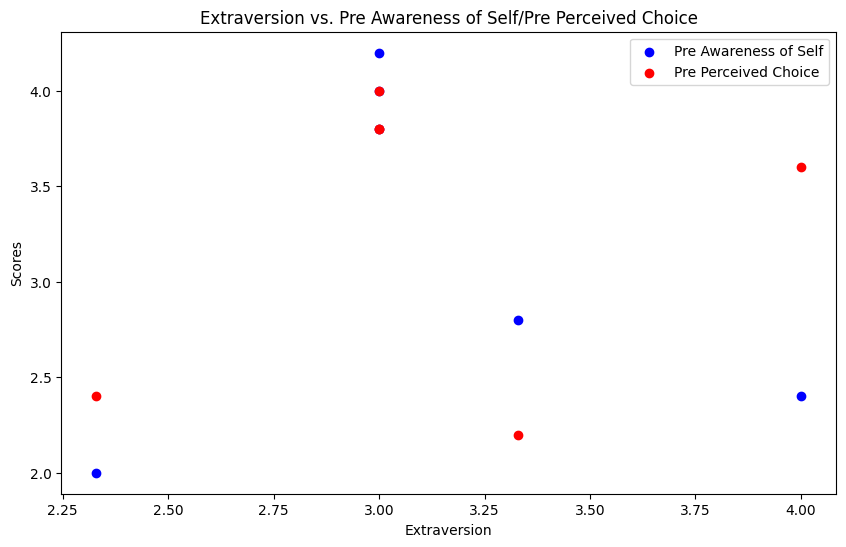

Correlation between Extraversion and Pre Awareness of Self: -0.05100756258121794, p-value: 0.9235550111379593
Correlation between Extraversion and Pre Perceived Choice: 0.2516636219139028, p-value: 0.6304740718499278


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

data = {
    'Participants': ['Participant1', 'Participant2', 'Participant3', 'Participant4', 'Participant5', 'Participant6'],
    'Pre_Survey_Awareness_of_Self': [2, 2.4, 4, 2.8, 3.8, 4.2],
    'Pre_Survey_Perceived_Choice': [2.4, 3.6, 3.8, 2.2, 4, 3.8],
    'Post_Survey_Awareness_of_Self': [3.8, 2.6, 3.8, 2.8, 4.6, 4.8],
    'Post_Survey_Perceived_Choice': [4, 4, 4, 2, 4.2, 4.2],
    'Extraversion': [2.33, 4, 3, 3.33, 3, 3],
    'Agreeableness': [2.33, 4.33, 3, 3.67, 3, 3.33],
    'Conscientiousness': [3.67, 3, 3.33, 3, 2.33, 3.67],
    'Negative_Emotionality': [3.67, 2.33, 3.33, 3.33, 2, 4],
    'Open_Mindedness': [4, 3, 3.67, 3.67, 4, 4.33]
}

# Calculate correlations and p-values for Extraversion vs. Pre_Awareness_of_self
corr1, pval1 = stats.pearsonr(data['Extraversion'], data['Pre_Survey_Awareness_of_Self'])
corr2, pval2 = stats.pearsonr(data['Extraversion'], data['Pre_Survey_Perceived_Choice'])

# Create a scatter plot for Extraversion vs. Pre_Awareness_of_self
plt.figure(figsize=(10, 6))
plt.scatter(data['Extraversion'], data['Pre_Survey_Awareness_of_Self'], color='blue', label='Pre Awareness of Self')
plt.scatter(data['Extraversion'], data['Pre_Survey_Perceived_Choice'], color='red', label='Pre Perceived Choice')
plt.xlabel('Extraversion')
plt.ylabel('Scores')
plt.title('Extraversion vs. Pre Awareness of Self/Pre Perceived Choice')
plt.legend()
plt.show()

print(f"Correlation between Extraversion and Pre Awareness of Self: {corr1}, p-value: {pval1}")
print(f"Correlation between Extraversion and Pre Perceived Choice: {corr2}, p-value: {pval2}")


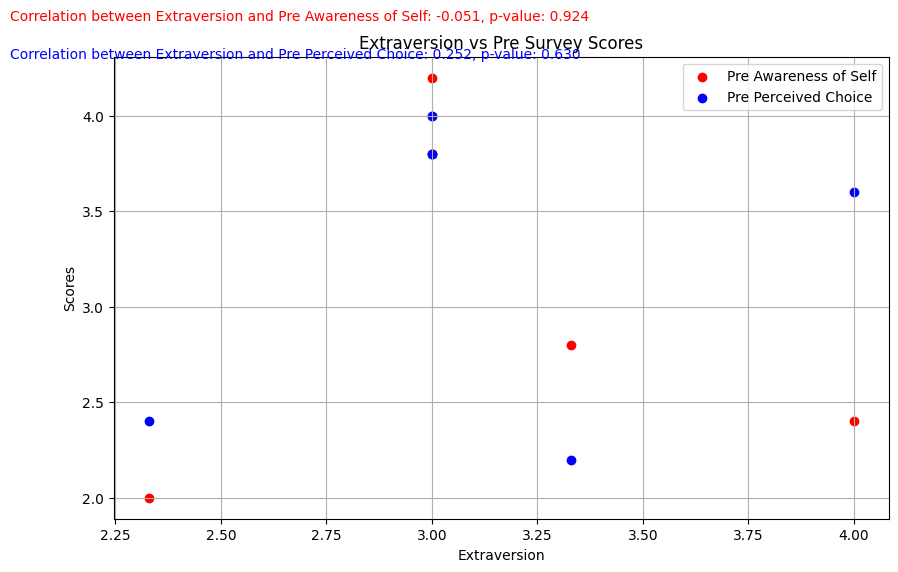

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Data
data = {
    'Participants': ['Participant1', 'Participant2', 'Participant3', 'Participant4', 'Participant5', 'Participant6'],
    'Pre_Survey_Awareness_of_Self': [2, 2.4, 4, 2.8, 3.8, 4.2],
    'Pre_Survey_Perceived_Choice': [2.4, 3.6, 3.8, 2.2, 4, 3.8],
    'Post_Survey_Awareness_of_Self': [3.8, 2.6, 3.8, 2.8, 4.6, 4.8],
    'Post_Survey_Perceived_Choice': [4, 4, 4, 2, 4.2, 4.2],
    'Extraversion': [2.33, 4, 3, 3.33, 3, 3],
    'Agreeableness': [2.33, 4.33, 3, 3.67, 3, 3.33],
    'Conscientiousness': [3.67, 3, 3.33, 3, 2.33, 3.67],
    'Negative_Emotionality': [3.67, 2.33, 3.33, 3.33, 2, 4],
    'Open_Mindedness': [4, 3, 3.67, 3.67, 4, 4.33]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate correlations and p-values
corr_awareness, p_value_awareness = pearsonr(df['Extraversion'], df['Pre_Survey_Awareness_of_Self'])
corr_choice, p_value_choice = pearsonr(df['Extraversion'], df['Pre_Survey_Perceived_Choice'])

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Extraversion'], df['Pre_Survey_Awareness_of_Self'], color='red', label='Pre Awareness of Self')
plt.scatter(df['Extraversion'], df['Pre_Survey_Perceived_Choice'], color='blue', label='Pre Perceived Choice')

# Annotate correlation coefficients and p-values
plt.text(2, 4.5, f'Correlation between Extraversion and Pre Awareness of Self: {corr_awareness:.3f}, p-value: {p_value_awareness:.3f}', color='red')
plt.text(2, 4.3, f'Correlation between Extraversion and Pre Perceived Choice: {corr_choice:.3f}, p-value: {p_value_choice:.3f}', color='blue')

plt.xlabel('Extraversion')
plt.ylabel('Scores')
plt.title('Extraversion vs Pre Survey Scores')
plt.legend()
plt.grid(True)
plt.show()


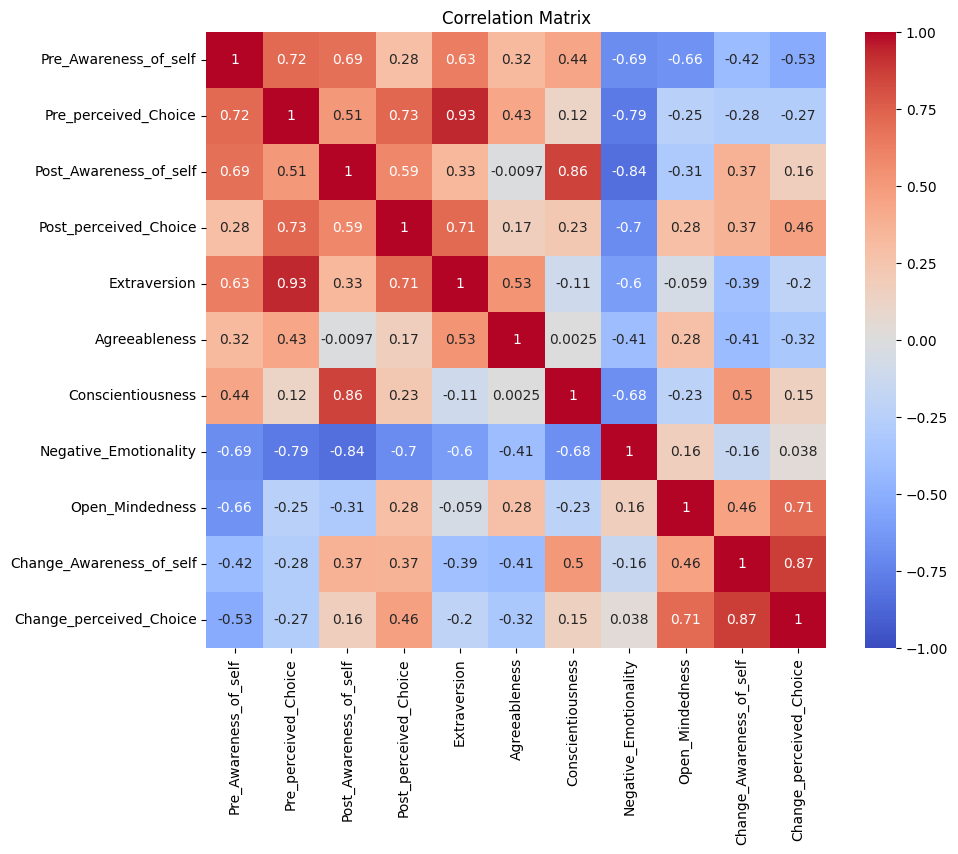

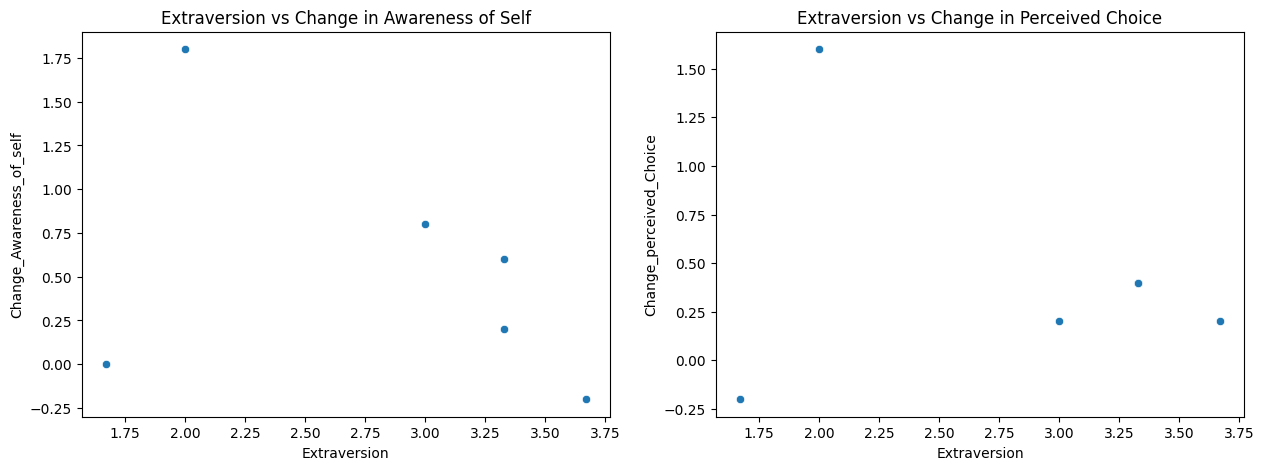

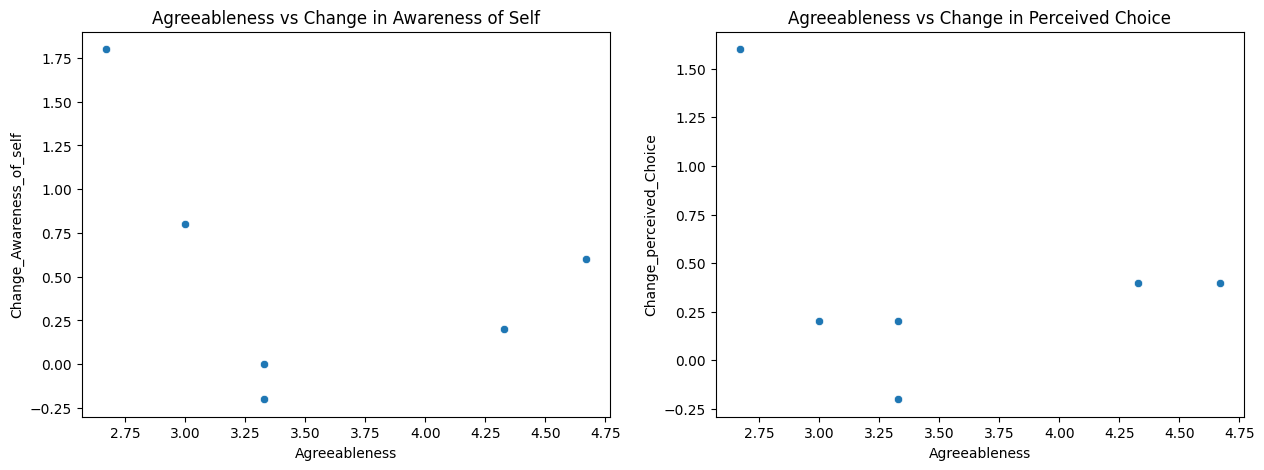

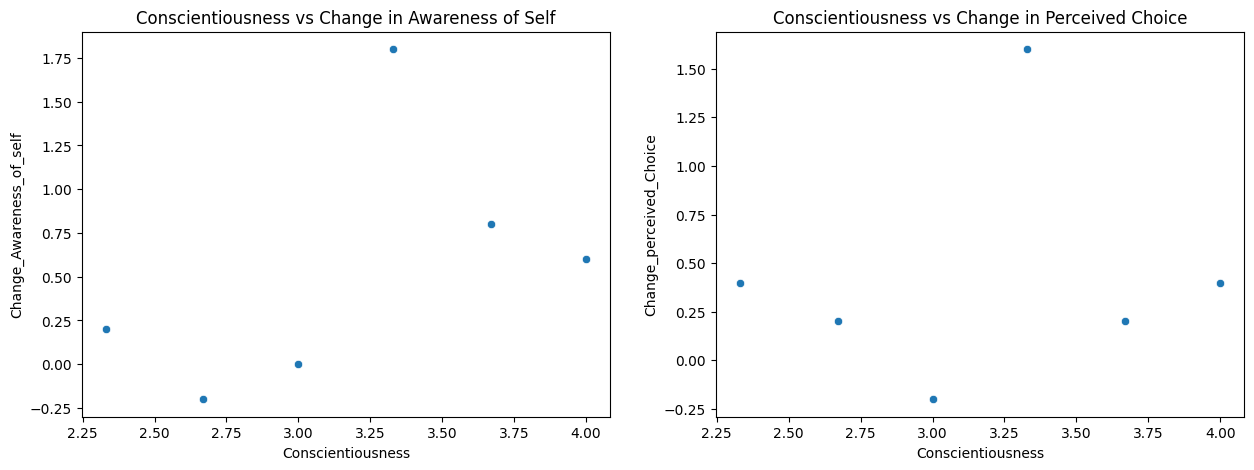

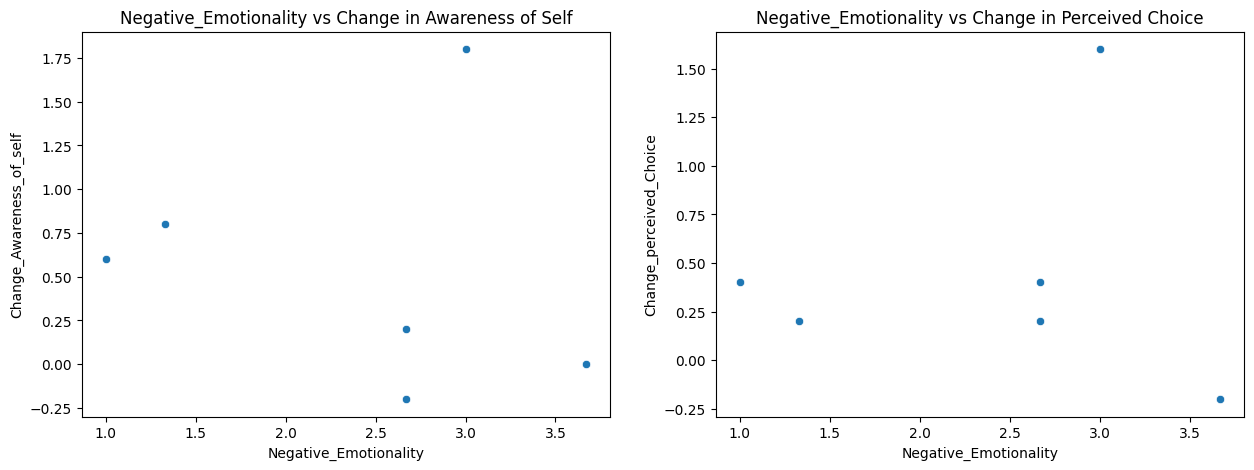

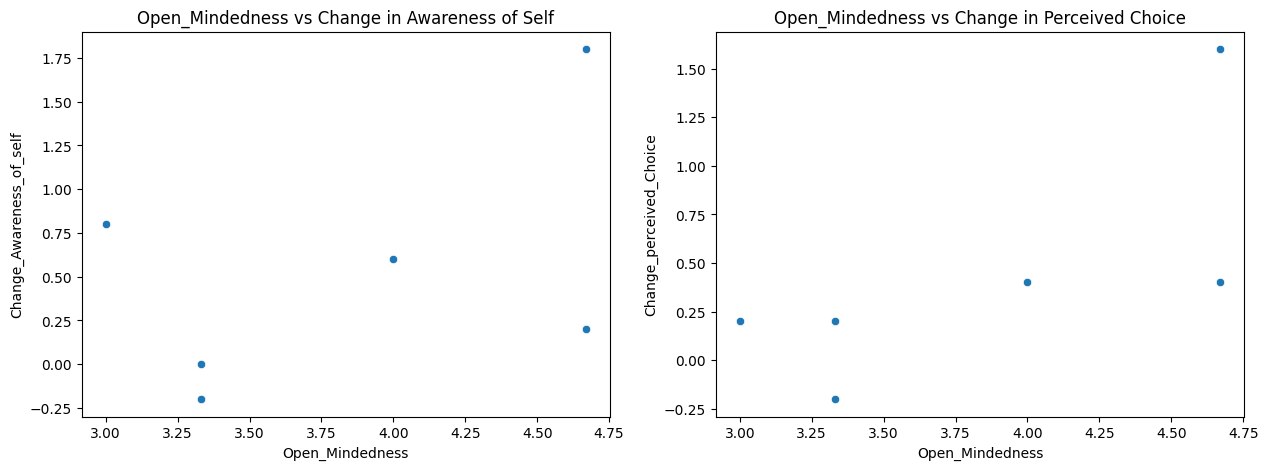

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data into a DataFrame
data = {
    "ParticipantID": ["Particip1", "Particip2", "Particip3", "Particip4", "Particip5", "Particip6"],
    "Pre_Awareness_of_self": [2, 2.4, 4, 2.8, 3.8, 4.2],
    "Pre_perceived_Choice": [2.4, 3.6, 3.8, 2.2, 4, 3.8],
    "Post_Awareness_of_self": [3.8, 2.6, 3.8, 2.8, 4.6, 4.8],
    "Post_perceived_Choice": [4, 4, 4, 2, 4.2, 4.2],
    "Extraversion": [2, 3.33, 3.67, 1.67, 3, 3.33],
    "Agreeableness": [2.67, 4.33, 3.33, 3.33, 3, 4.67],
    "Conscientiousness": [3.33, 2.33, 2.67, 3, 3.67, 4],
    "Negative_Emotionality": [3, 2.67, 2.67, 3.67, 1.33, 1],
    "Open_Mindedness": [4.67, 4.67, 3.33, 3.33, 3, 4]
}

df = pd.DataFrame(data)

# Calculate changes in awareness and perceived choice
df["Change_Awareness_of_self"] = df["Post_Awareness_of_self"] - df["Pre_Awareness_of_self"]
df["Change_perceived_Choice"] = df["Post_perceived_Choice"] - df["Pre_perceived_Choice"]

# Drop ParticipantID column for correlation calculation
df_numeric = df.drop(columns=["ParticipantID"])

# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Plotting the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

# Scatter plots for visualization
traits = ["Extraversion", "Agreeableness", "Conscientiousness", "Negative_Emotionality", "Open_Mindedness"]

for trait in traits:
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    sns.scatterplot(x=df[trait], y=df["Change_Awareness_of_self"], ax=axs[0])
    axs[0].set_title(f"{trait} vs Change in Awareness of Self")
    sns.scatterplot(x=df[trait], y=df["Change_perceived_Choice"], ax=axs[1])
    axs[1].set_title(f"{trait} vs Change in Perceived Choice")
    plt.show()


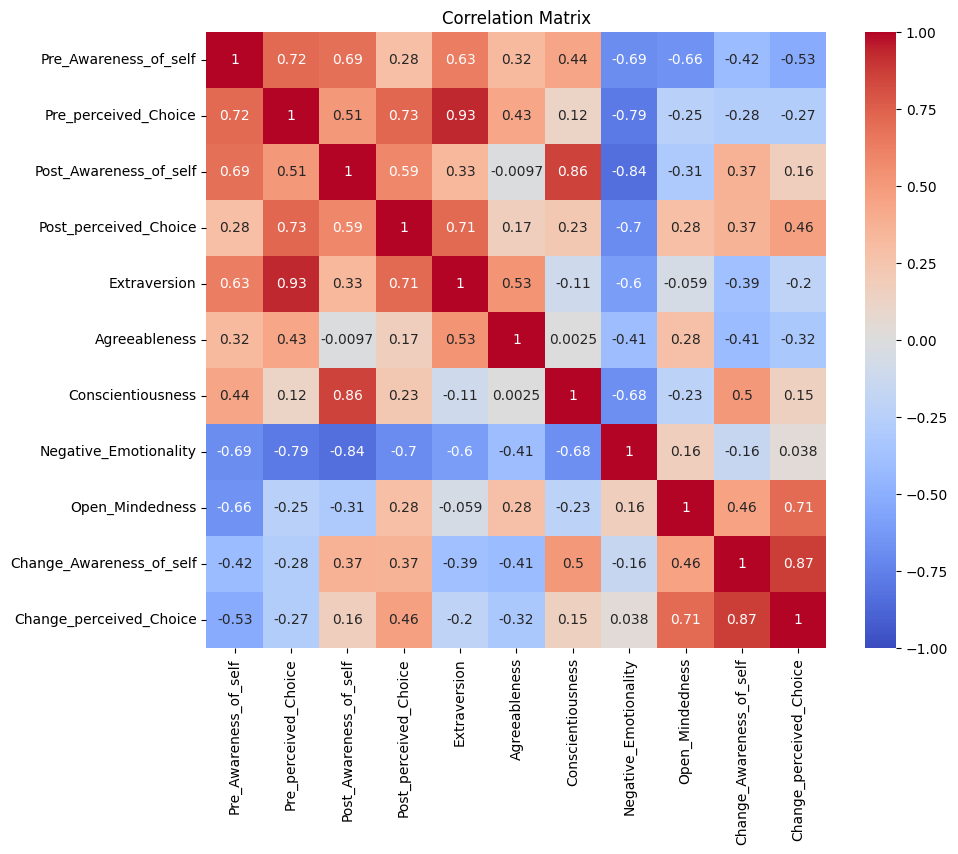

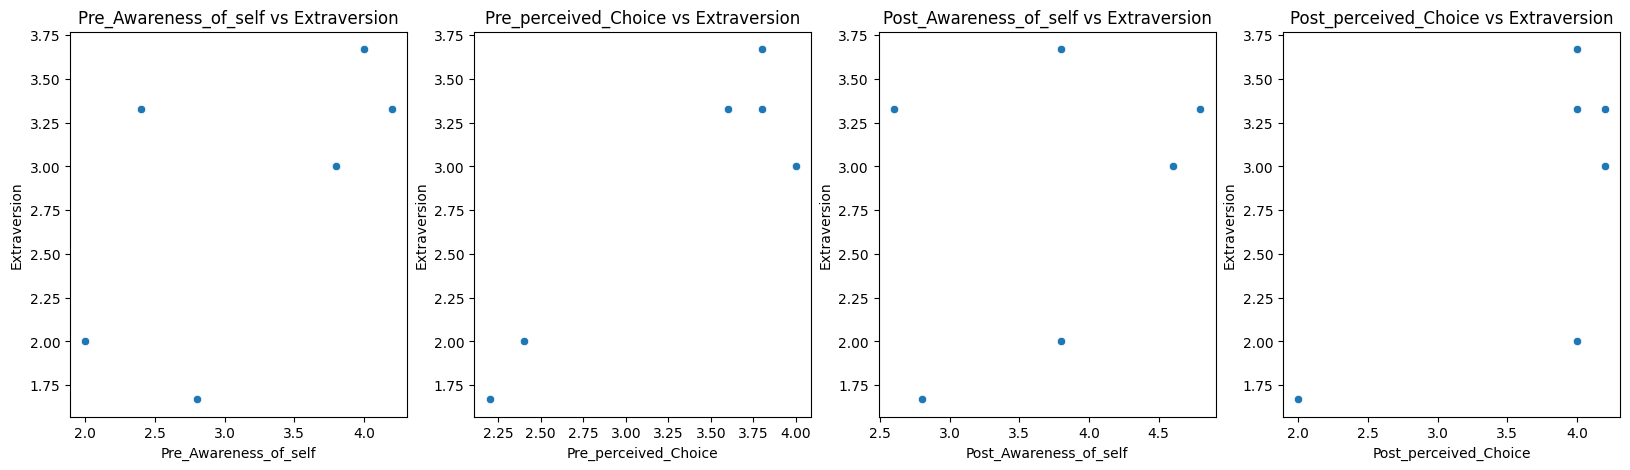

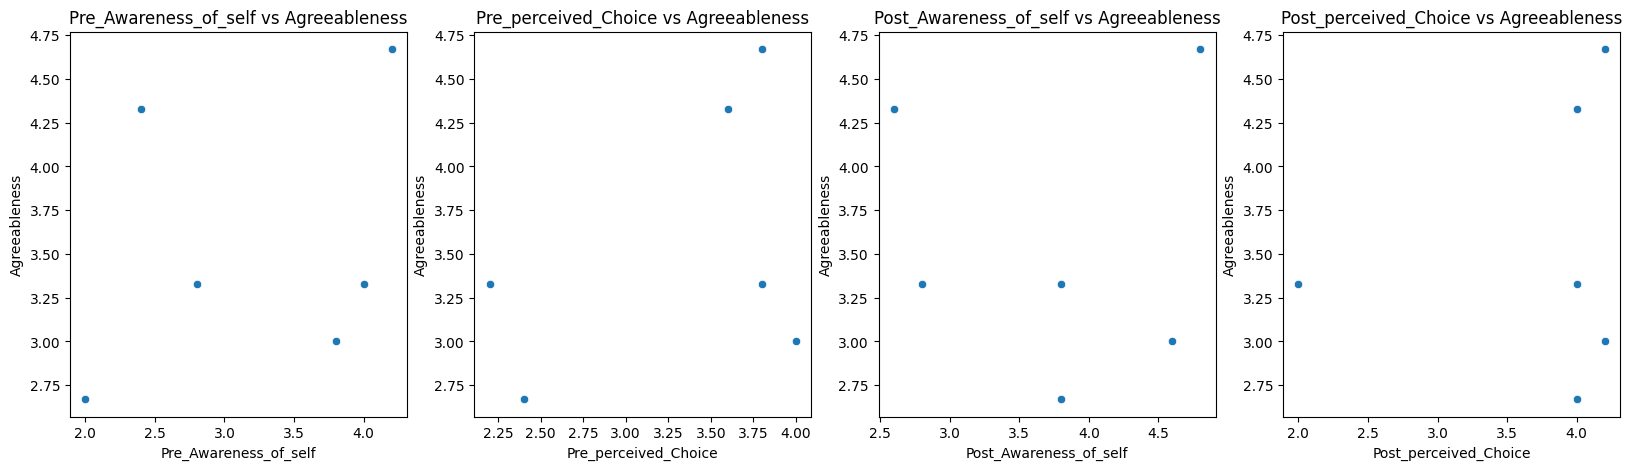

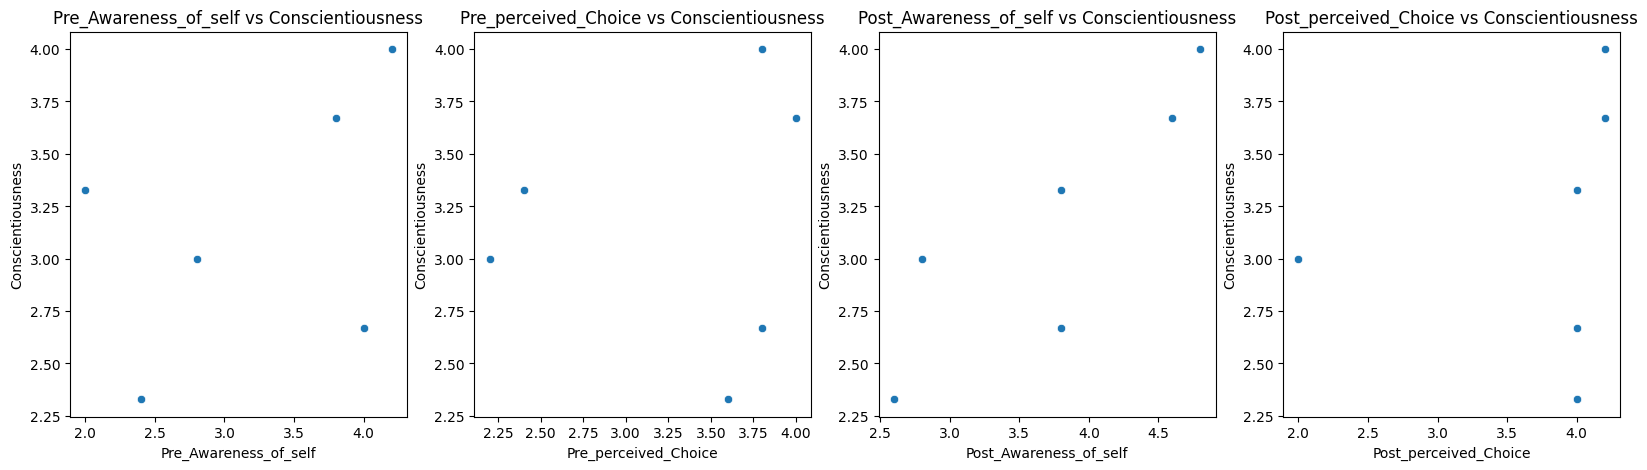

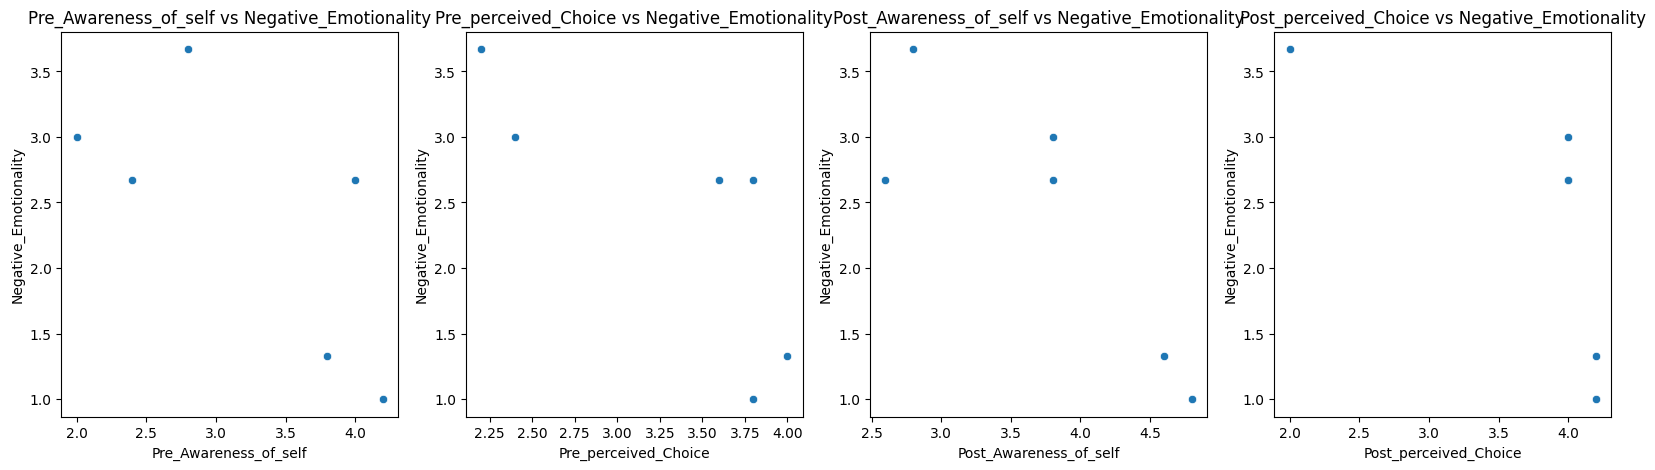

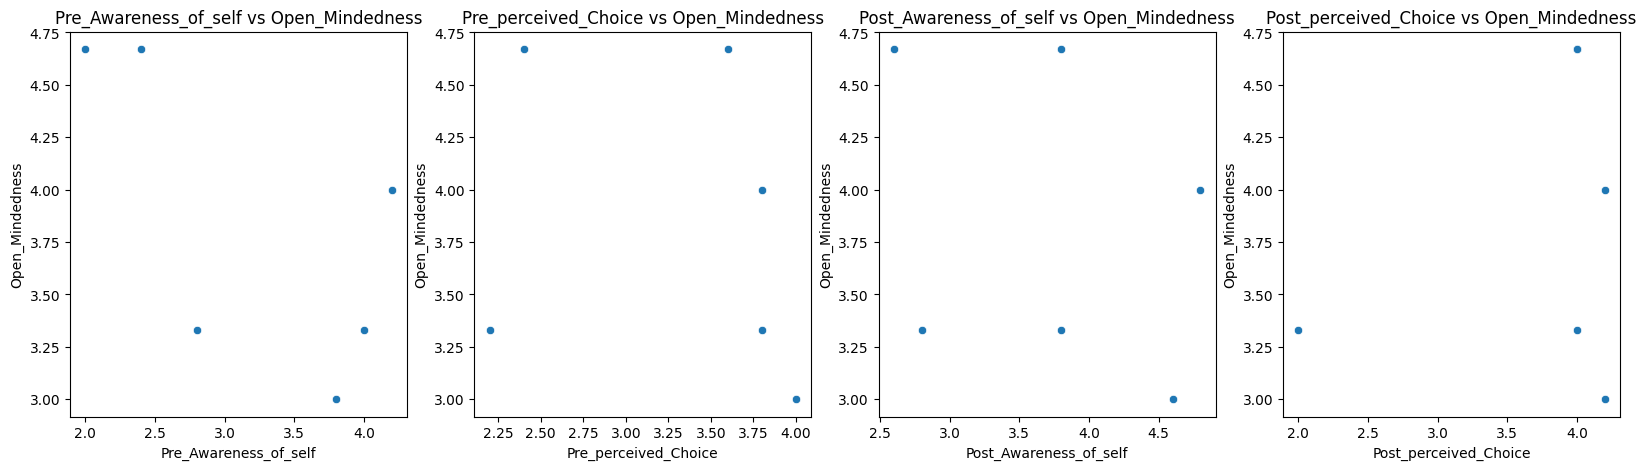

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data into a DataFrame
data = {
    "ParticipantID": ["Particip1", "Particip2", "Particip3", "Particip4", "Particip5", "Particip6"],
    "Pre_Awareness_of_self": [2, 2.4, 4, 2.8, 3.8, 4.2],
    "Pre_perceived_Choice": [2.4, 3.6, 3.8, 2.2, 4, 3.8],
    "Post_Awareness_of_self": [3.8, 2.6, 3.8, 2.8, 4.6, 4.8],
    "Post_perceived_Choice": [4, 4, 4, 2, 4.2, 4.2],
    "Extraversion": [2, 3.33, 3.67, 1.67, 3, 3.33],
    "Agreeableness": [2.67, 4.33, 3.33, 3.33, 3, 4.67],
    "Conscientiousness": [3.33, 2.33, 2.67, 3, 3.67, 4],
    "Negative_Emotionality": [3, 2.67, 2.67, 3.67, 1.33, 1],
    "Open_Mindedness": [4.67, 4.67, 3.33, 3.33, 3, 4]
}

df = pd.DataFrame(data)

# Calculate changes in awareness and perceived choice
df["Change_Awareness_of_self"] = df["Post_Awareness_of_self"] - df["Pre_Awareness_of_self"]
df["Change_perceived_Choice"] = df["Post_perceived_Choice"] - df["Pre_perceived_Choice"]

# Drop ParticipantID column for correlation calculation
df_numeric = df.drop(columns=["ParticipantID"])

# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Plotting the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

# Scatter plots for visualization
traits = ["Extraversion", "Agreeableness", "Conscientiousness", "Negative_Emotionality", "Open_Mindedness"]
x_axes = ["Pre_Awareness_of_self", "Pre_perceived_Choice", "Post_Awareness_of_self", "Post_perceived_Choice"]

for trait in traits:
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))
    for i, x_axis in enumerate(x_axes):
        sns.scatterplot(x=df[x_axis], y=df[trait], ax=axs[i])
        axs[i].set_title(f"{x_axis} vs {trait}")
    plt.show()
